# <center>Marking Guide question Five</center>

# Task 1: Principal Component Analysis (PCA)

Explained Variance Ratios: [0.18077488 0.15611722 0.14211278 0.13327244 0.11535163 0.10277003
 0.09542713 0.07417389]
Cumulative Explained Variance: [0.18077488 0.33689209 0.47900488 0.61227731 0.72762895 0.83039898
 0.92582611 1.        ]


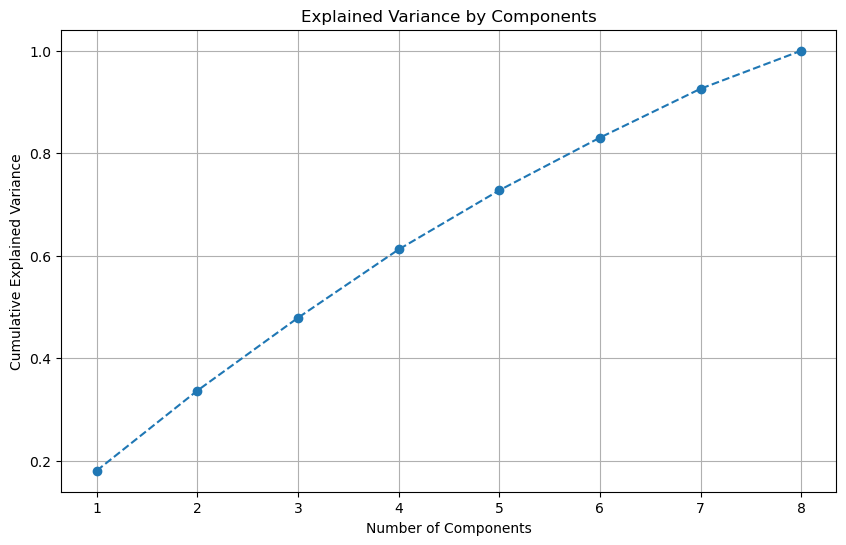

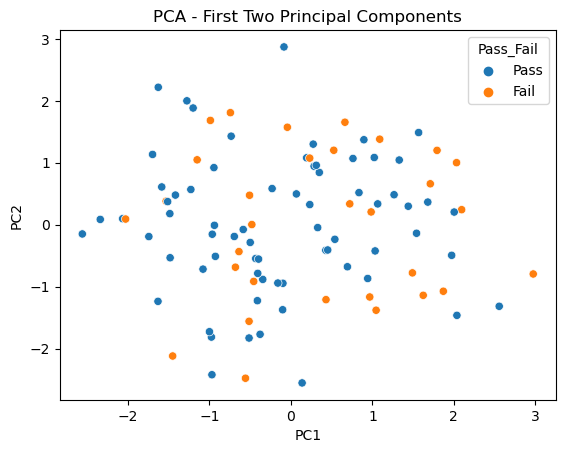

Loadings:
                    PC1       PC2       PC3       PC4       PC5       PC6  \
Height        0.372269 -0.262015  0.154809  0.271922 -0.624473  0.533354   
Weight       -0.337665  0.243640 -0.495342  0.136792  0.217909  0.690003   
Age           0.330630  0.070179 -0.013630  0.723996  0.250961 -0.235118   
Satisfaction -0.078414  0.373867  0.664748 -0.120287  0.006059  0.259491   
Trust        -0.512406 -0.030812  0.071741  0.584216 -0.161519 -0.103920   
Purchases    -0.606317 -0.243793  0.240264  0.018277 -0.220126 -0.125858   
Study_Hours  -0.011534  0.447772 -0.413601 -0.089114 -0.651893 -0.300035   
Attendance   -0.040242 -0.682936 -0.233785 -0.138287  0.004880  0.012327   

                   PC7       PC8  
Height       -0.105540  0.096360  
Weight        0.147415  0.131247  
Age           0.411836  0.271168  
Satisfaction  0.527472 -0.228292  
Trust        -0.200637 -0.559367  
Purchases     0.133226  0.657905  
Study_Hours   0.323024 -0.032106  
Attendance    0.597450 -

In [2]:
# Import libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "../dataset/multivariate_analysis_data.csv"  # Adjust the path if needed
df = pd.read_csv(data_path)

# Exclude the "Pass_Fail" column
features = df.drop(columns=["Pass_Fail"])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

# Cumulative explained variance
cumulative_variance = explained_variance.cumsum()
print("Cumulative Explained Variance:", cumulative_variance)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Visualize the first two components
pca_df = pd.DataFrame(pca_result[:, :2], columns=['PC1', 'PC2'])
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=df['Pass_Fail'])
plt.title('PCA - First Two Principal Components')
plt.show()

# Loadings (contribution of original features to each principal component)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(features.columns))], index=features.columns)
print("Loadings:\n", loadings)


# Task 2: Factor Analysis

Factor Loadings:
                Factor1   Factor2
Satisfaction -0.068635  0.292530
Trust        -0.539371 -0.130630
Purchases    -0.561988  0.095801


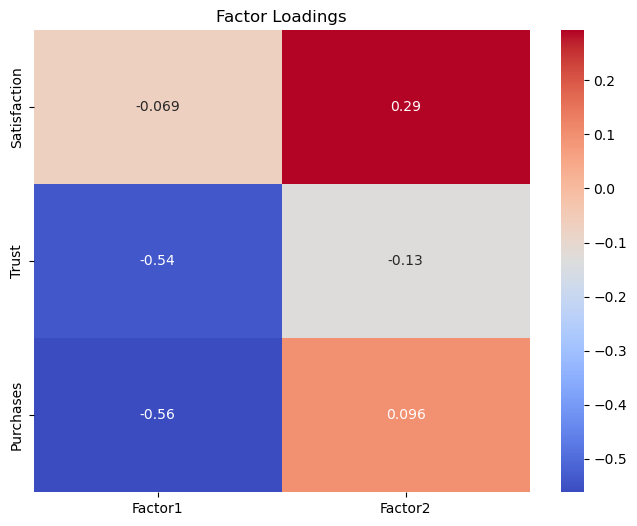

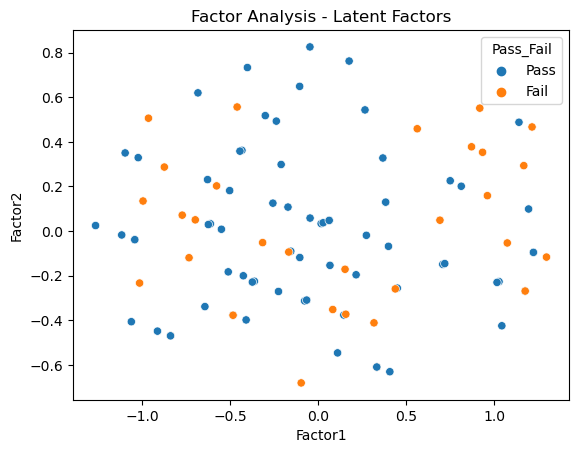

In [3]:
from sklearn.decomposition import FactorAnalysis

# Select variables for factor analysis
fa_features = df[['Satisfaction', 'Trust', 'Purchases']]

# Standardize the data
fa_scaled_data = scaler.fit_transform(fa_features)

# Apply Factor Analysis
fa = FactorAnalysis(n_components=2, random_state=42)
fa_result = fa.fit_transform(fa_scaled_data)

# Factor loadings (how each variable contributes to the factors)
factor_loadings = pd.DataFrame(fa.components_.T, index=fa_features.columns, columns=['Factor1', 'Factor2'])
print("Factor Loadings:\n", factor_loadings)

# Visualize factor loadings
plt.figure(figsize=(8, 6))
sns.heatmap(factor_loadings, annot=True, cmap='coolwarm')
plt.title('Factor Loadings')
plt.show()

# Add factor scores to the dataset for analysis
df['Factor1'] = fa_result[:, 0]
df['Factor2'] = fa_result[:, 1]

# Check the latent structure visually
sns.scatterplot(x='Factor1', y='Factor2', data=df, hue='Pass_Fail')
plt.title('Factor Analysis - Latent Factors')
plt.show()
